# Data 620 Project2
#### Raghunathan Ramnath, Dilip Ganesan and Ahmed Sajjad

#### Identify a large 2-mode network dataset—you can start with a dataset in a repository.  Your data should meet the criteria that it consists of ties between and not within two (or more) distinct groups.
#### Reduce the size of the network using a method such as the island method described in chapter 4 of social network analysis.
#### What can you infer about each of the distinct groups?

Project presentation can be found at:

https://youtu.be/Fhjx5F3NTaY

In [165]:
import networkx as nx
import networkx.algorithms.bipartite as bi
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.figure(figsize=(15,10))
%matplotlib inline

### CEOs and clubs.

The membership of the chief executive officers from 26 corporations in 15 clubs.

CEOs.net - two-mode network with 41 vertices and 98 edges. 

http://vlado.fmf.uni-lj.si/pub/networks/data/WaFa/default.htm


## 1. Load Data
As a first step we are loading the data into dataframe from csv file. there are two node CEOs and clubs

In [166]:
df = pd.read_csv("ceos_net.csv")
df.head()

,CEO,club-1,club-2,club-3,club-4,club-5,club-6,club-7,club-8,club-9,club-10,club-11,club-12,club-13,club-14,club-15
0,CE0-1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
1,CE0-2,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0
2,CE0-3,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,CE0-4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
4,CE0-5,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0


In [167]:
dft = pd.melt(df,id_vars=["CEO"],var_name="CLUB", value_name = "values")
dft.set_index('CEO')
dft[:5]

,CEO,CLUB,values
0,CE0-1,club-1,0
1,CE0-2,club-1,0
2,CE0-3,club-1,0
3,CE0-4,club-1,0
4,CE0-5,club-1,0


In [168]:
ceos = dft.CEO.unique()
ceos


array(['CE0-1', 'CE0-2', 'CE0-3', 'CE0-4', 'CE0-5', 'CE0-6', 'CE0-7',
       'CE0-8', 'CE0-9', 'CE0-10', 'CE0-11', 'CE0-12', 'CE0-13', 'CE0-14',
       'CE0-15', 'CE0-16', 'CE0-17', 'CE0-18', 'CE0-19', 'CE0-20',
       'CE0-21', 'CE0-22', 'CE0-23', 'CE0-24', 'CE0-25', 'CE0-26'],
      dtype=object)

In [169]:
clubs = dft.CLUB.unique()
clubs

array(['club-1', 'club-2', 'club-3', 'club-4', 'club-5', 'club-6',
       'club-7', 'club-8', 'club-9', 'club-10', 'club-11', 'club-12',
       'club-13', 'club-14', 'club-15'], dtype=object)

In [170]:
stacked = df.set_index('CEO').stack()
stacked = stacked[stacked==1]
#we are interested in the 1's as it indicates the nodes are connected.
stacked

CEO            
CE0-1   club-3     1
        club-4     1
        club-9     1
CE0-2   club-3     1
        club-5     1
        club-7     1
CE0-3   club-3     1
        club-12    1
CE0-4   club-2     1
        club-3     1
        club-15    1
CE0-5   club-3     1
        club-13    1
        club-14    1
CE0-6   club-2     1
        club-3     1
        club-14    1
CE0-7   club-3     1
        club-4     1
        club-10    1
        club-11    1
CE0-8   club-4     1
        club-7     1
        club-10    1
CE0-9   club-1     1
        club-4     1
        club-8     1
        club-10    1
CE0-10  club-3     1
        club-9     1
                  ..
CE0-19  club-3     1
        club-4     1
        club-7     1
        club-9     1
CE0-20  club-2     1
        club-3     1
        club-4     1
        club-11    1
        club-15    1
CE0-21  club-3     1
        club-4     1
        club-8     1
CE0-22  club-3     1
        club-8     1
        club-15    1
CE0-23  club-2    

In [171]:
ceo_club_edges = stacked.index.tolist()
#This gives the list of edges between CEOs and clubs.
ceo_club_edges

[('CE0-1', 'club-3'),
 ('CE0-1', 'club-4'),
 ('CE0-1', 'club-9'),
 ('CE0-2', 'club-3'),
 ('CE0-2', 'club-5'),
 ('CE0-2', 'club-7'),
 ('CE0-3', 'club-3'),
 ('CE0-3', 'club-12'),
 ('CE0-4', 'club-2'),
 ('CE0-4', 'club-3'),
 ('CE0-4', 'club-15'),
 ('CE0-5', 'club-3'),
 ('CE0-5', 'club-13'),
 ('CE0-5', 'club-14'),
 ('CE0-6', 'club-2'),
 ('CE0-6', 'club-3'),
 ('CE0-6', 'club-14'),
 ('CE0-7', 'club-3'),
 ('CE0-7', 'club-4'),
 ('CE0-7', 'club-10'),
 ('CE0-7', 'club-11'),
 ('CE0-8', 'club-4'),
 ('CE0-8', 'club-7'),
 ('CE0-8', 'club-10'),
 ('CE0-9', 'club-1'),
 ('CE0-9', 'club-4'),
 ('CE0-9', 'club-8'),
 ('CE0-9', 'club-10'),
 ('CE0-10', 'club-3'),
 ('CE0-10', 'club-9'),
 ('CE0-11', 'club-2'),
 ('CE0-11', 'club-3'),
 ('CE0-11', 'club-9'),
 ('CE0-12', 'club-4'),
 ('CE0-12', 'club-7'),
 ('CE0-13', 'club-3'),
 ('CE0-13', 'club-4'),
 ('CE0-13', 'club-5'),
 ('CE0-13', 'club-9'),
 ('CE0-14', 'club-2'),
 ('CE0-14', 'club-3'),
 ('CE0-14', 'club-4'),
 ('CE0-14', 'club-11'),
 ('CE0-14', 'club-12'),
 ('CE

## 2. Analysis

In [172]:
G = nx.Graph(ceo_club_edges)
print(nx.info(G))

degree = nx.degree(G)
degree = dict(list(degree))
print(min(degree.values()))
print(max(degree.values()))


Name: 
Type: Graph
Number of nodes: 41
Number of edges: 98
Average degree:   4.7805
2
22


## 2.1 Graph of Entire Network

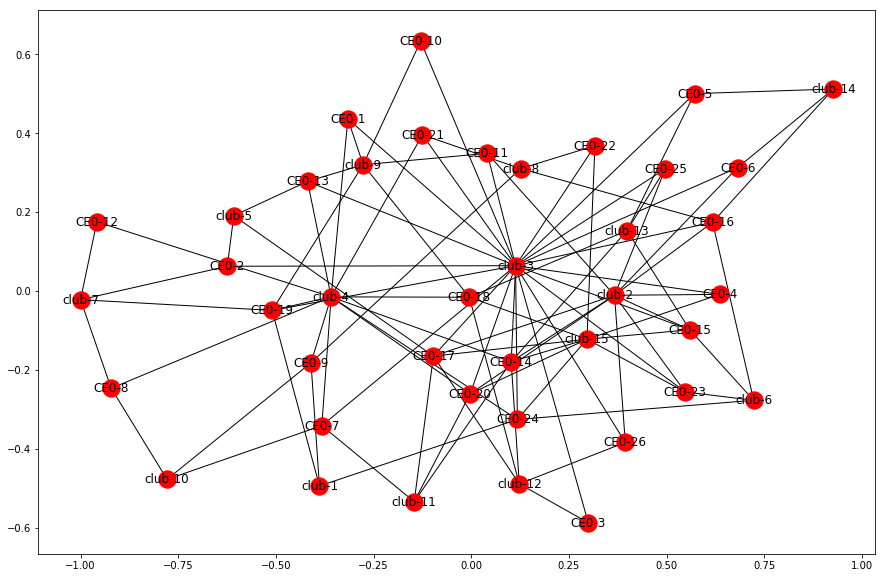

In [173]:
plt.figure(figsize = (15,10))
#graph of the entire network that includes CEOs and Clubs.
nx.draw_networkx(G)

## 2.2 Graph of Clubs

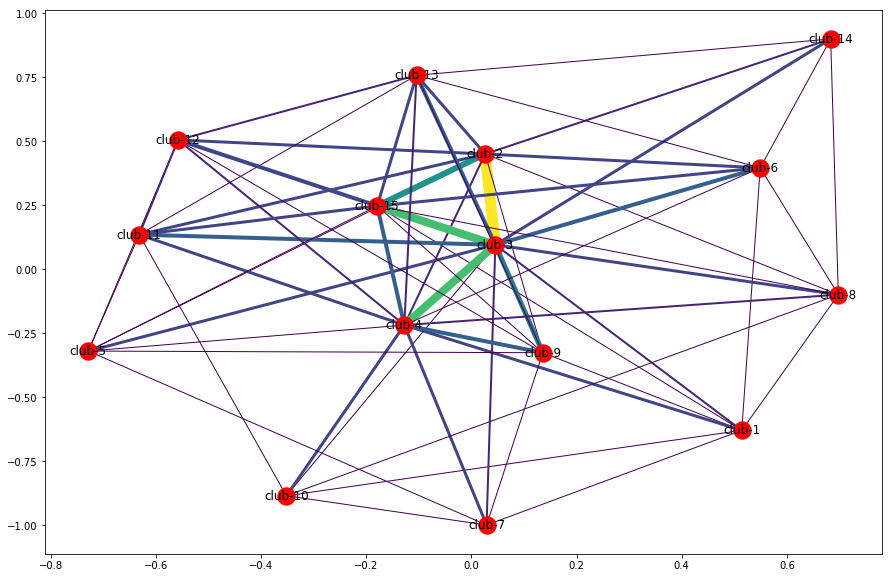

In [174]:
club_Gp = nx.bipartite.project(G,df.set_index('CEO').columns)
# or
# nx.bipartite.project(G,df.set_index('DOC').index)

club_e = bi.weighted_projected_graph(G, club_Gp, ratio=False)
weights=[edata['weight'] for f,t,edata in club_e.edges(data=True)]
plt.figure(figsize=(15,10))
nx.draw_networkx(club_e, width=weights, edge_color=weights)


###  Degree Centrality of Clubs

In [175]:
# Degree of Clubs (number of edges adjacent each node)
def sort_x(x):
    sort = sorted(x.items(), key = lambda kv: (-kv[1], kv[0]) )
    return sort

C_degree = nx.degree(club_Gp)
C_degree = {k:round(v,1) for k, v in (C_degree)}
C_degree = sort_x(C_degree)
C_degree

[('club-3', 14),
 ('club-4', 13),
 ('club-15', 11),
 ('club-2', 11),
 ('club-13', 9),
 ('club-9', 9),
 ('club-1', 8),
 ('club-11', 8),
 ('club-12', 8),
 ('club-5', 8),
 ('club-6', 8),
 ('club-8', 8),
 ('club-10', 6),
 ('club-7', 6),
 ('club-14', 5)]

In [176]:
#Center
print("Center : " , nx.center(club_Gp))

#Diameter
print("Diameter : " ,nx.diameter(club_Gp))

#Radius
print("Radius : " ,nx.radius(club_Gp))

Center :  ['club-3']
Diameter :  2
Radius :  1


## 2.3. Graph of CEOs

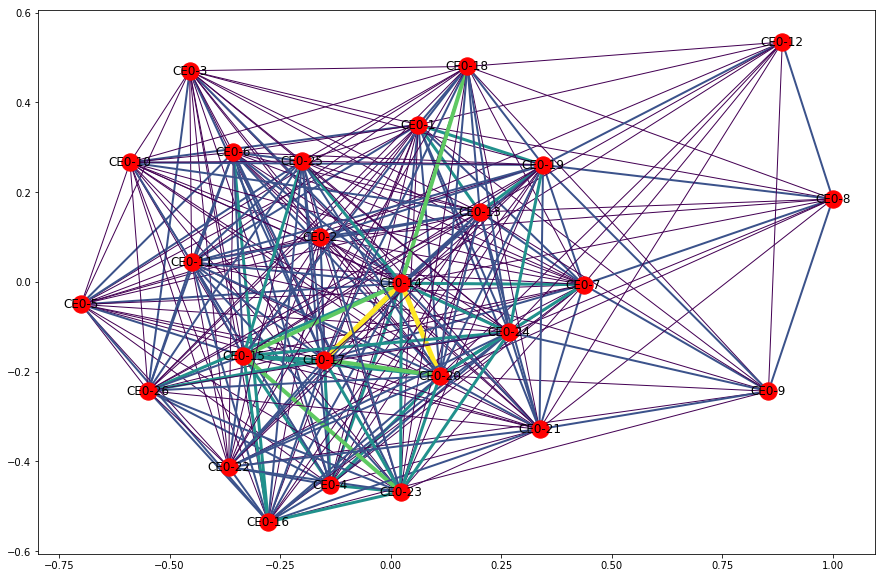

In [177]:
ceo_Gp = nx.bipartite.project(G,df.set_index('CEO').index)
ceo_e = bi.weighted_projected_graph(G, ceo_Gp, ratio=False)

weights=[edata['weight'] for f,t,edata in ceo_e.edges(data=True)]
plt.figure(figsize=(15,10))
nx.draw_networkx(ceo_e, width=weights, edge_color=weights)


###  Degree Centrality of CEOs

In [178]:
# Degree of CEOs (number of edges adjacent each node)
def sort_x(x):
    sort = sorted(x.items(), key = lambda kv: (-kv[1], kv[0]) )
    return sort

C_degree = nx.degree(ceo_Gp)
C_degree = {k:round(v,1) for k, v in (C_degree)}
C_degree = sort_x(C_degree)
C_degree

[('CE0-1', 25),
 ('CE0-13', 25),
 ('CE0-14', 25),
 ('CE0-19', 25),
 ('CE0-20', 25),
 ('CE0-21', 25),
 ('CE0-24', 25),
 ('CE0-7', 25),
 ('CE0-2', 23),
 ('CE0-22', 23),
 ('CE0-10', 22),
 ('CE0-11', 22),
 ('CE0-15', 22),
 ('CE0-16', 22),
 ('CE0-17', 22),
 ('CE0-18', 22),
 ('CE0-23', 22),
 ('CE0-25', 22),
 ('CE0-26', 22),
 ('CE0-3', 22),
 ('CE0-4', 22),
 ('CE0-5', 22),
 ('CE0-6', 21),
 ('CE0-9', 13),
 ('CE0-12', 12),
 ('CE0-8', 12)]

In [179]:
#Center
print("Center : " , nx.center(ceo_Gp))

#Diameter
print("Diameter : " ,nx.diameter(ceo_Gp))

#Radius
print("Radius : " ,nx.radius(ceo_Gp))

Center :  ['CE0-1', 'CE0-7', 'CE0-13', 'CE0-14', 'CE0-19', 'CE0-20', 'CE0-21', 'CE0-24']
Diameter :  2
Radius :  1


From the stats output we can see the center is occupied by 8 CEOs ('CE0-1', 'CE0-7', 'CE0-13', 'CE0-14', 'CE0-19', 'CE0-20', 'CE0-21', 'CE0-24') 
and 1 Club (Club-3).


## 3. Island Analysis

### CEOs

In [180]:
## Implementing the Island Method to identify subgroups. 
def trim_edges(g, weight = 1):
    # Implements a trimming of the graph edges for the Island Analysis
    edges = []
    g2 = nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            x = float(edata['weight'])
            edges.append((f,to,x))
    g2.add_weighted_edges_from(edges)
    return g2

def island_method(g, iterations = 4):
    # Iterates through the graph removing edges and returning the number of edges removed and
    #  the trimmed graph
    weights = [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    step = int((mx-mn)/iterations)
    return [[threshold, trim_edges(g,threshold)] for threshold in range(mn,mx,step)]

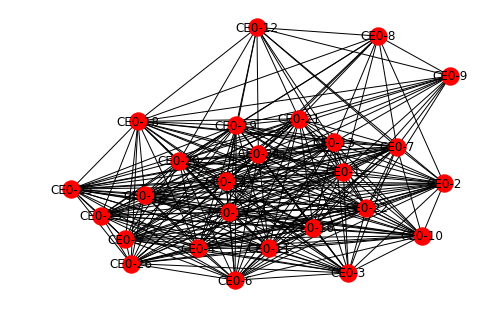

In [181]:
# Build the graph from the node sets and edges
# set bipartite attribute to ensure weighted projection will work
ceo_nodes = list(dft['CEO'].unique())
club_nodes = list(dft['CLUB'].unique())
#edge_bunch = [tuple(i) for i in dft.values]

g = nx.Graph()
g.add_nodes_from(ceo_nodes,node_type='CEO', bipartite=0)
g.add_nodes_from(club_nodes,node_type='CLUB', bipartite=1)
g.add_edges_from(ceo_club_edges)

l=bi.weighted_projected_graph(g,ceo_nodes)
pos = nx.spring_layout(l)
nx.draw(l, pos = pos, with_labels=True)


In [182]:
cc=list(nx.connected_component_subgraphs(l))[0]
print(nx.info(cc)) 
islands = island_method(l)


Name: 
Type: Graph
Number of nodes: 26
Number of edges: 284
Average degree:  21.8462


In [183]:
print("Threshold, Nodes/Size, Edges, Number of Connected Components")
for i in islands:
    print (i[0], nx.number_of_nodes(i[1]), nx.number_of_edges(i[1]), nx.number_connected_components(i[1]) 
           ,nx.degree_centrality(i[1]))

Threshold, Nodes/Size, Edges, Number of Connected Components
1 26 134 1 {'CE0-1': 0.4, 'CE0-21': 0.4, 'CE0-10': 0.16, 'CE0-14': 0.8, 'CE0-18': 0.32, 'CE0-24': 0.6, 'CE0-19': 0.56, 'CE0-7': 0.4, 'CE0-11': 0.56, 'CE0-13': 0.48, 'CE0-20': 0.72, 'CE0-2': 0.12, 'CE0-17': 0.68, 'CE0-3': 0.12, 'CE0-26': 0.44, 'CE0-4': 0.48, 'CE0-22': 0.36, 'CE0-23': 0.48, 'CE0-16': 0.56, 'CE0-6': 0.44, 'CE0-25': 0.44, 'CE0-15': 0.56, 'CE0-5': 0.2, 'CE0-9': 0.2, 'CE0-8': 0.16, 'CE0-12': 0.08}
2 16 33 1 {'CE0-1': 0.13333333333333333, 'CE0-19': 0.2, 'CE0-13': 0.13333333333333333, 'CE0-4': 0.3333333333333333, 'CE0-14': 0.6666666666666666, 'CE0-23': 0.4666666666666667, 'CE0-17': 0.4, 'CE0-20': 0.4666666666666667, 'CE0-15': 0.5333333333333333, 'CE0-6': 0.06666666666666667, 'CE0-16': 0.2, 'CE0-7': 0.13333333333333333, 'CE0-18': 0.06666666666666667, 'CE0-26': 0.13333333333333333, 'CE0-24': 0.3333333333333333, 'CE0-25': 0.13333333333333333}
3 6 6 1 {'CE0-14': 0.8, 'CE0-18': 0.2, 'CE0-17': 0.4, 'CE0-15': 0.4, 'CE0-20':


This is interpreted as: at a threshold of 1, there are 26 nodes and at a threshold of 2, there are 16 nodes and at a threshold of 3, there are 6 nodes and for a threshold of 4, there are 3 nodes. In all cases the island is 1. since this is not a larger data set, there is only 1 island. CEO-14 has high degree centrality. Though 8 CEOs has high degree, CEO-14 is the one who has high degree centrality and influence.

#### Analyze the Threshold 1.

In [184]:
#downloaded from chapter 4 in the SNA book
import triadic
import draw_triads
islands[0]
islands_1 = islands[0][1]

In [185]:
## Run the triadic census
census, node_census = triadic.triadic_census(islands_1)

In [186]:
census

{'003': 586.0,
 '012': 0,
 '102': 1159,
 '021D': 0,
 '021U': 0,
 '021C': 0,
 '111D': 0,
 '111U': 0,
 '030T': 0,
 '030C': 0,
 '201': 508,
 '120D': 0,
 '120U': 0,
 '120C': 0,
 '210': 0,
 '300': 347}

In [187]:
## get only the number of closed triads, and sort the list by the value, descending
closed_triads=[[-k,v] for k,v in sorted([[-node_census[k]['300'],k] for k in
node_census.keys()])]

In [188]:
closed_triads

[[83, 'CE0-14'],
 [38, 'CE0-11'],
 [33, 'CE0-1'],
 [33, 'CE0-20'],
 [31, 'CE0-24'],
 [26, 'CE0-17'],
 [25, 'CE0-21'],
 [15, 'CE0-26'],
 [13, 'CE0-4'],
 [12, 'CE0-18'],
 [10, 'CE0-19'],
 [6, 'CE0-16'],
 [6, 'CE0-23'],
 [4, 'CE0-7'],
 [3, 'CE0-10'],
 [3, 'CE0-22'],
 [3, 'CE0-6'],
 [2, 'CE0-13'],
 [1, 'CE0-25'],
 [0, 'CE0-12'],
 [0, 'CE0-15'],
 [0, 'CE0-2'],
 [0, 'CE0-3'],
 [0, 'CE0-5'],
 [0, 'CE0-8'],
 [0, 'CE0-9']]

16 of the CEOs has close triads. CEO-20 has the maximum number of closed triads.

In [189]:
cliques = list(nx.find_cliques(islands_1))

In [190]:
len(cliques)

18

A clique in a social network as a cohesive group of people that are tightly connected to each other (and not tightly connected to people outside the group). A clique is defined as a maximal complete subgraph of a given graph—i.e., a group of people where everybody is connected directly to everyone else. The word “maximal” means that no other nodes can be added to the clique without making it less connected. Essentially, a clique consists of several overlapping closed triads, and inherits many of the culture-generating, and amplification properties of closed triads. 

Here we can see the cliques of CE0s. 

Its obvious that CEO-14,CEO-20 and CEO-17 are in most of the network. The same observation is noticeable from Threshold 4.

In [191]:
cliques

[['CE0-10', 'CE0-1', 'CE0-11', 'CE0-19', 'CE0-13'],
 ['CE0-14',
  'CE0-20',
  'CE0-1',
  'CE0-19',
  'CE0-13',
  'CE0-24',
  'CE0-21',
  'CE0-7'],
 ['CE0-14', 'CE0-20', 'CE0-1', 'CE0-19', 'CE0-13', 'CE0-24', 'CE0-18'],
 ['CE0-14', 'CE0-20', 'CE0-1', 'CE0-19', 'CE0-13', 'CE0-11'],
 ['CE0-14', 'CE0-20', 'CE0-21', 'CE0-24', 'CE0-22', 'CE0-16'],
 ['CE0-14', 'CE0-20', 'CE0-17', 'CE0-13', 'CE0-24', 'CE0-18'],
 ['CE0-14', 'CE0-20', 'CE0-17', 'CE0-13', 'CE0-24', 'CE0-7'],
 ['CE0-14', 'CE0-20', 'CE0-17', 'CE0-13', 'CE0-11'],
 ['CE0-14',
  'CE0-20',
  'CE0-17',
  'CE0-15',
  'CE0-4',
  'CE0-23',
  'CE0-16',
  'CE0-24',
  'CE0-22'],
 ['CE0-14',
  'CE0-20',
  'CE0-17',
  'CE0-15',
  'CE0-4',
  'CE0-23',
  'CE0-16',
  'CE0-6',
  'CE0-26',
  'CE0-11',
  'CE0-25'],
 ['CE0-14', 'CE0-20', 'CE0-17', 'CE0-15', 'CE0-18', 'CE0-24'],
 ['CE0-14', 'CE0-5', 'CE0-25', 'CE0-16', 'CE0-15', 'CE0-6'],
 ['CE0-14', 'CE0-3', 'CE0-26', 'CE0-17'],
 ['CE0-8', 'CE0-19', 'CE0-9', 'CE0-7'],
 ['CE0-8', 'CE0-19', 'CE0-12'],
 